# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [3]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
from scipy.signal import convolve2d
from scipy.signal import correlate2d
from skimage.color import rgb2gray
from skimage.draw import circle

from skimage.filters import threshold_otsu

Pretty printing has been turned OFF


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



In [4]:
# Definition of convolution
def conv_n(n, h, x):
    length_x = len(x)
    length_h = len(h)
    conv_sum = 0
    if(length_x <= length_h):
        for i in range(0, length_x):
            if(n-i < 0):
                h = 0
                conv_sum = conv_sum + x[i]*h
            else:
                conv_sum = conv_sum + x[i]*h[n-i]
    else:
        for i in range(0, length_h):
            if(n-i < 0):
                x = 0
                conv_sum = conv_sum + h[i]*x
            else:
                conv_sum = conv_sum + h[i]*x[n-i]
            
    return conv_sum

def conv_fn(x, h):
    if(len(x) >= len(h)):
        length = len(x) 
        h_new = np.zeros(len(h)+len(x))
        x_new = x
        for i in range(0, len(h)):
            h_new[i] = h[i]        
    else:
        length = len(h) 
        x_new = np.zeros(len(h)+len(x))
        h_new = h
        for i in range(0, len(x)):
            x_new[i] = x[i] 
    
    length = len(h) + len(x)
    convolution = np.zeros(length)
    for i in range(0, length):
        convolution[i] = conv_n(i, h_new, x_new)
    
    return convolution
            

# Definition of a Dirac function
def dirac(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s

# Definition of Step function
def step(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Create the ramp
    for idx_s in np.arange(n, N):
        s[idx_s] = 1
    
    return s

In [61]:
xn = [1, 2, 3, 4]
'''
# Dirac 
drc = dirac(0, 5)
conv1 = conv_fn(xn, drc)
conv2 = np.convolve(xn, drc)
print("")
print("For dirac :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)

# Step 
stp = step(0, 5)
conv1 = conv_fn(xn, stp)
conv2 = np.convolve(xn, stp)
print("")
print("For step :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)

# Exponential
ex = [1, np.exp(1), np.exp(2), np.exp(3), np.exp(4)]
conv1 = conv_fn(xn, ex)
conv2 = np.convolve(xn, ex)
print("")
print("For the exponential :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)

# H = {-1, 1}
h = [-1, 1]
conv1 = conv_fn(xn, h)
conv2 = np.convolve(xn, h)
print("")
print("For H = {-1, 1} :")
print("")
print("My answer :")
print(conv1)
print("Python's answer :")
print(conv2)
'''
# Step 
h = step(0, 5)

# For the case where we have symmetric, periodic or constant padding
xn_s = [4, 3, 2, 1, 2, 3, 4, 3, 2, 1] # symmetric padding
xn_p = [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4] # periodic padding
xn_c = [1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1] # Constant padding

conv = conv_fn(xn, h)
conv_s = conv_fn(xn_s, h)
conv_p = conv_fn(xn_p, h)
conv_c = conv_fn(xn_c, h)
print("Zero padding :")
print(conv)
print("Symmetric padding :")
print(conv_s)
print("Periodic padding :")
print(conv_p)
print("Constant padding :")
print(conv_c)



Zero padding :
[  1.   3.   6.  10.  10.   9.   7.   4.   0.]
Symmetric padding :
[  4.   7.   9.  10.  12.  11.  12.  13.  14.  13.  10.   6.   3.   1.   0.]
Periodic padding :
[  1.   3.   6.  10.  11.  12.  13.  14.  11.  12.  13.  14.  10.   9.   7.
   4.   0.]
Constant padding :
[  1.   2.   3.   4.   5.   6.   8.  11.  11.  11.  10.   8.   4.   3.   2.
   1.   0.]


## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [57]:
def conv_2D(x, h):   
    pad_vertical = int(np.floor(len(h)/2))
    pad_horizontal = int(np.floor(len(h[0])/2))
    
    # Zero padding
    new_x = np.zeros((len(x)+2*len(h), len(x[0])+2*len(h[0])))
    b_last_x = new_x
    for i in range(len(h), len(h)+len(x)):
        for j in range(len(h[0]), len(h[0])+len(x[0])):
            new_x[i][j] = x[i-len(h)][j-len(h[0])]
    
    # 2D Convolution
    summ = 0
    for i in range(0, len(h)+len(x)):
        for j in range(0, len(h[0])+len(x[0])):
            summ = 0
            for l in range(0, len(h)):
                for k in range(0, len(h[0])):
                    summ = summ + new_x[i+l][j+k] * h[l][k]
            b_last_x[i][j] = summ
            
    for i in range(len(b_last_x)-pad_vertical-1 ,0 ,-1):
        for j in range(len(b_last_x[0])-pad_horizontal-1 ,0 ,-1):
            b_last_x[i+pad_vertical][j+pad_horizontal] = b_last_x[i][j]
             
    return b_last_x

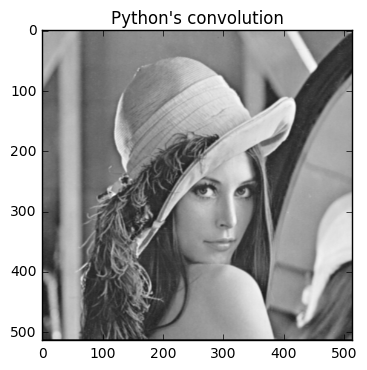

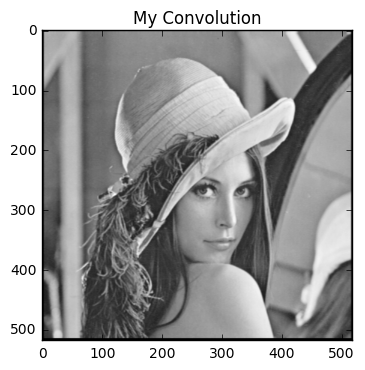

In [58]:
X = plt.imread("../images/lena-grey.bmp")
H = [[1/256, 4/256, 6/256, 4/256, 1/256], [4/256, 16/256, 24/256, 16/256, 4/256], [6/256, 24/256, 36/256, 24/256, 6/256], [4/256, 16/256, 24/256, 16/256, 4/256], [1/256, 4/256, 6/256, 4/256, 1/256]]
conv = conv_2D(X, K)
conv2 = convolve2d(X, K)

plt.figure()
plt.title("Python's convolution")
plt.imshow(conv2, cmap='gray')

plt.figure()
plt.title("My Convolution")
plt.imshow(conv, cmap='gray')


## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.

In [67]:
a = plt.imread("../images/a.png")
a = rgb2gray(a)
text = plt.imread("../images/text.png")
text = rgb2gray(text)
Ta = threshold_otsu(a)
Ttext = threshold_otsu(text)
aB = np.zeros((a.shape))
textB = np.zeros((text.shape))
for i in range(0, len(a)):
    for j in range(0, len(a[0])):
        if(a[i][j] >= Ta):
            aB[i][j] = 255
        else:
            aB[i][j] = 0
        
            
for i in range(0, len(text)):
    for j in range(0, len(text[0])):
        if(text[i][j] >= Ttext):
            textB[i][j] = 255
        
corr = correlate2d(textB, aB, boundary='symm', mode='same')
maxi = np.amax(corr, 1)
# The highest correlation values correspond to where the letter a is.
# I tried to label them but I couldn't find out how to do it (the code below is my trial and error).





#y, x = np.unravel_index(np.argmax(corr), corr.shape)
#size = textB.shape
#template = aB

#fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1, figsize=(6, 15))
#ax_orig.imshow(text, cmap='gray')
#ax_orig.set_title('Original')
#ax_orig.set_axis_off()
#ax_template.imshow(template, cmap='gray')
#ax_template.set_title('Template')
#ax_template.set_axis_off()
#ax_corr.imshow(corr, cmap='gray')
#ax_corr.set_title('Cross-correlation')
#ax_corr.set_axis_off()
#ax_orig.plot(x, y, 'ro')
#fig.show()






(320,)
(320, 220)
